In [1]:
import pandas as pd
import numpy as np

avs = ["Ad-Aware", "AhnLab-V3", "Acronis", "Ad-Aware", "Alibaba", "ALYac", "Antiy-AVL", "Avast", "AVG", 
       "Avira (no cloud)", "BitDefender", "BitDefenderTheta", "Comodo", 
       "CrowdStrike Falcon", "Cybereason", "Cylance", "Cynet", "Cyren", "DrWeb", 
       " Elastic", "Emsisoft", "eScan", "ESET-NOD32", "Fortinet", "GData", "Ikarus", 
       "Jiangmin", "K7AntiVirus", "K7GW", "Kaspersky", "Lionic", "Malwarebytes", "MAX", 
       "McAfee", "McAfee-GW-Edition", "Microsoft", "NANO-Antivirus", "Palo Alto Networks", 
       "Panda", "QuickHeal", "Sangfor Engine Zero", "SecureAge", "SentinelOne (Static ML)", 
       "Sophos", "Symantec", "Tencent", "Trellix (FireEye)", "TrendMicro", "TrendMicro-HouseCall", 
       "VBA32", "VIPRE", "Yandex", "Zillya", "ZoneAlarm by Check Point", "Acronis (Static ML)", "Arcabit",
       "Baidu", "Bkav Pro", "ClamAV", "CMC", "Gridinsoft (no cloud)", "Kingsoft", "MaxSecure",
       "Rising", "SUPERAntiSpyware", "TACHYON", "ViRobot", "Webroot", "WithSecure", "Zoner", "Avast-Mobile", 
       "BitDefenderFalx", "Symantec Mobile Insight", "Trapmine", "Trustlook", "SuperAntiSpyware"]

def removeAllOccurenceStr(inputs, target:str):
    while (inputs.count(target)):
        inputs.remove(target) 
    return inputs

def removeAllOccurenceList(inputs, ls:list):
    for l in ls:
        ls = removeAllOccurenceStr(inputs, l.lower())
    return inputs

def findType1(vt:list):
    '''
    List from VirusTotal:
    ["adware","banker","downloader","dropper","fakeav","hacktool","miner","phishing","pua","ransomware","spyware","trojan","virus","worm"]
    Disregard phishing and fakeav
    '''
    types = [['trojan', 0],['adware',0],['downloader',0],['ransomware',0],['miner',0],['dropper',0],['pua',0],['virus',0],['miner',0],['undetected',0],['worm',0],['spyware',0],['banker',0]]
    for v in vt:
        if "troj" in v or "trj" in v:
            types[0][1] += 1
        if "adw" in v:
            types[1][1] += 1
        if "down" in v:
            types[2][1] += 1
        if "rans" in v:
            types[3][1] += 1
        if "mine" in v or "crypt" in v:
            types[4][1] += 1
        if "drop" in v:
            types[5][1] += 1
        if "pua" in v or "pup" in v or "susp" in v or "bundl" in v or "gray" in v or "grey" in v:
            types[6][1] += 1
        if "vir" in v:
            types[7][1] += 1
        if "hack" in v:
            types[8][1] += 1
        if "undetected" in v:
            types[9][1] += 1
        if "worm" in v:
            types[10][1] += 1
        if "spy" in v or "backd" in v:
            types[11][1] += 1
        if "bank" in v:
            types[12][1] += 1
    types[9][1] = int(types[9][1]*.05) # <=== Normalizing quantity 'undetected' to be non-invasive of other malware types.
    types.sort(key=lambda x: x[1], reverse=True)
    print(types,"\n")
    return types

filename = 'Labelling_DBSCAN_Clustering.csv' # <== Update this to point to the <Data_Clustering>_SampleHash_Common.csv file
df = pd.read_csv(filename)
df

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,hash,pattern,cluster,Type 1
0,071e8c3f8922e186e57548cd4c703a5d,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",0,trojan
1,33f8e6d08a6aae939f25a8e0d63dd523,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",1,pua
2,b68abd064e975e1c6d5f25e748663076,"SetUnhandledExceptionFilter,OleInitialize,LdrL...",2,trojan
3,72049be7bd30ea61297ea624ae198067,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",-1,trojan
4,c9b3700a77facf29172f32df6bc77f48,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",-1,trojan
...,...,...,...,...
42792,e3d6d58faa040f0f9742c9d0eaf58be4,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",11,NaN
42793,9b917bab7f32188ae40c744f2be9aaf8,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",-1,NaN
42794,35a18ee05f75f04912018d9f462cb990,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",-1,NaN
42795,654139d715abcf7ecdddbef5a84f224b,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",11,NaN


In [2]:
for r in range(df.shape[0]):
    if(type(df.iloc[r,3]) == str and " " in df.iloc[r,3]):
        vt = df.iloc[r,3].lower().split("\n")
        for v in range(len(vt)):
            vt[v] = vt[v].strip()
        vt = removeAllOccurenceList(vt, avs)
        vt = removeAllOccurenceStr(vt, "Unable to process file type".lower())
        vt.sort()
        df.iloc[r,3] = findType1(vt)[0][0]

[['spyware', 20], ['trojan', 19], ['virus', 2], ['pua', 1], ['adware', 0], ['downloader', 0], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['banker', 0]] 

[['spyware', 20], ['trojan', 19], ['virus', 2], ['pua', 1], ['adware', 0], ['downloader', 0], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['banker', 0]] 

[['trojan', 23], ['downloader', 22], ['pua', 4], ['adware', 1], ['virus', 1], ['undetected', 1], ['worm', 1], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['miner', 0], ['spyware', 0], ['banker', 0]] 

[['trojan', 29], ['ransomware', 3], ['spyware', 2], ['dropper', 1], ['virus', 1], ['adware', 0], ['downloader', 0], ['miner', 0], ['pua', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['banker', 0]] 

[['trojan', 16], ['pua', 13], ['adware', 6], ['downloader', 0], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['virus', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['sp

,hash,pattern,cluster,Type 1
0,071e8c3f8922e186e57548cd4c703a5d,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",0,trojan
1,33f8e6d08a6aae939f25a8e0d63dd523,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",1,pua
2,b68abd064e975e1c6d5f25e748663076,"SetUnhandledExceptionFilter,OleInitialize,LdrL...",2,trojan
3,72049be7bd30ea61297ea624ae198067,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",-1,trojan
4,c9b3700a77facf29172f32df6bc77f48,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",-1,trojan
...,...,...,...,...
42792,e3d6d58faa040f0f9742c9d0eaf58be4,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",11,NaN
42793,9b917bab7f32188ae40c744f2be9aaf8,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",-1,NaN
42794,35a18ee05f75f04912018d9f462cb990,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",-1,NaN
42795,654139d715abcf7ecdddbef5a84f224b,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",11,NaN


<Axes: ylabel='Type 1'>

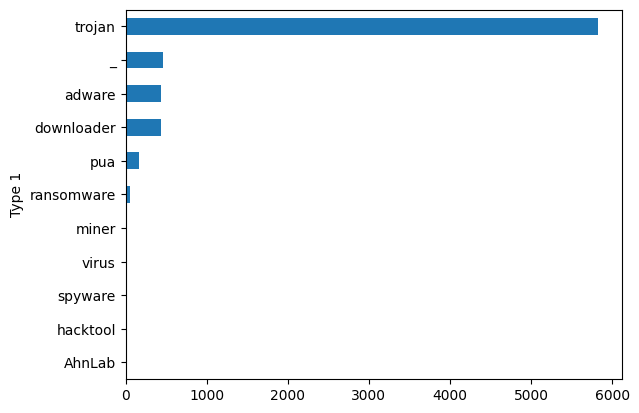

In [3]:
df.replace(to_replace='undetected', value='_', inplace=True) # <=== Replaces 'undetected' with '_'
df.to_csv('VirusTotal_Parsed.csv', index=False)
display(df)

cluster = df['cluster'].unique().tolist()
for c in cluster:
    counts = df[df['cluster'] == c]['Type 1'].value_counts()

df['Type 1'].value_counts(ascending=True).plot(kind='barh')